In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
x = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,4].values

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [6]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
as_ = accuracy_score(y_test,y_pred)
print("confusion_matrix:\n",cm)
print("accuracy_score:",as_)



confusion_matrix:
 [[64  4]
 [ 3 29]]
accuracy_score: 0.93


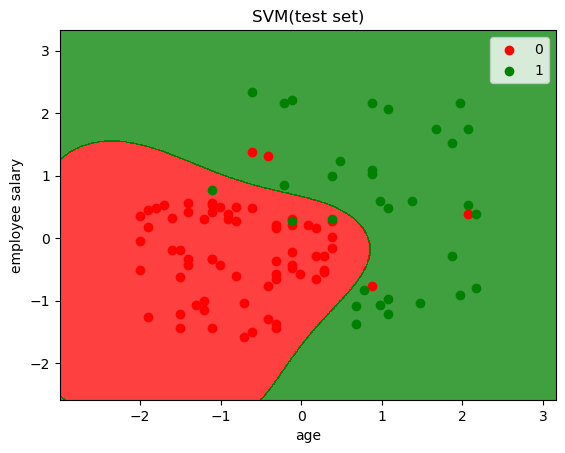

In [11]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_test,y_test
x1,x2 = np.meshgrid(np.arange(start = x_set[:,0].min()-1,stop =x_set[:,0].max()+1,step = 0.01),
                   np.arange(start = x_set[:,1].min() - 1,stop = x_set[:,1].max()+1,step = 0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75,cmap = ListedColormap(("red","green")))

plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
for i ,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set ==j,0],x_set[y_set== j,1],color = ListedColormap(('red','green'))(i),label = j)
    
plt.title("SVM(test set)")
plt.xlabel("age")
plt.ylabel("employee salary")
plt.legend()
plt.show()

    
                
    
